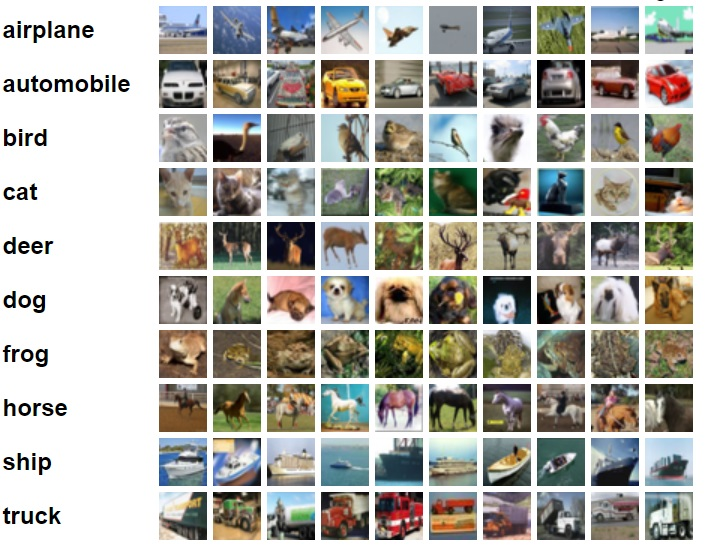

https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile5.png

## Importing dependencies for the project

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [140]:
tf.__version__

'2.12.0'

## Dataset preprocessing

### defining the predefined classes

there are 10 predefined classes in Cifar 10 dataset.

In [141]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### Loading the CIFAR 10 dataset

In [142]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

### splitting the dataset into train and validation set

In [143]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2)
X_train.shape, X_val.shape , y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

### Normalize the images

- The maximum value of a pixel in an image can be 255.

- Normalization ensures that each pixel is in the range [0, 1].

- Also normalizing images helps the model to converge faster.

In [144]:
#normalize
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [145]:
X_train.shape , X_val.shape , X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

- Image shape - (40000, 32, 32, 3) --> here :
        - 40000 , is the number of images.
        - 32 *32 , is the size of an image
        - 3 , is the channel width ( for color its 3 --> RGB , for grayscale it's value is 1)

#### display a random image

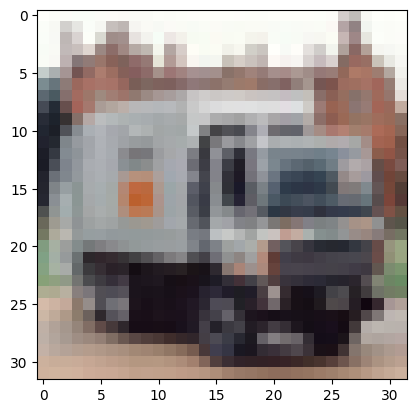

In [146]:
#display the image
plt.imshow(X_test[11])

the image at position 12 seems to be a truck

## Building a Convolutional Neural Network

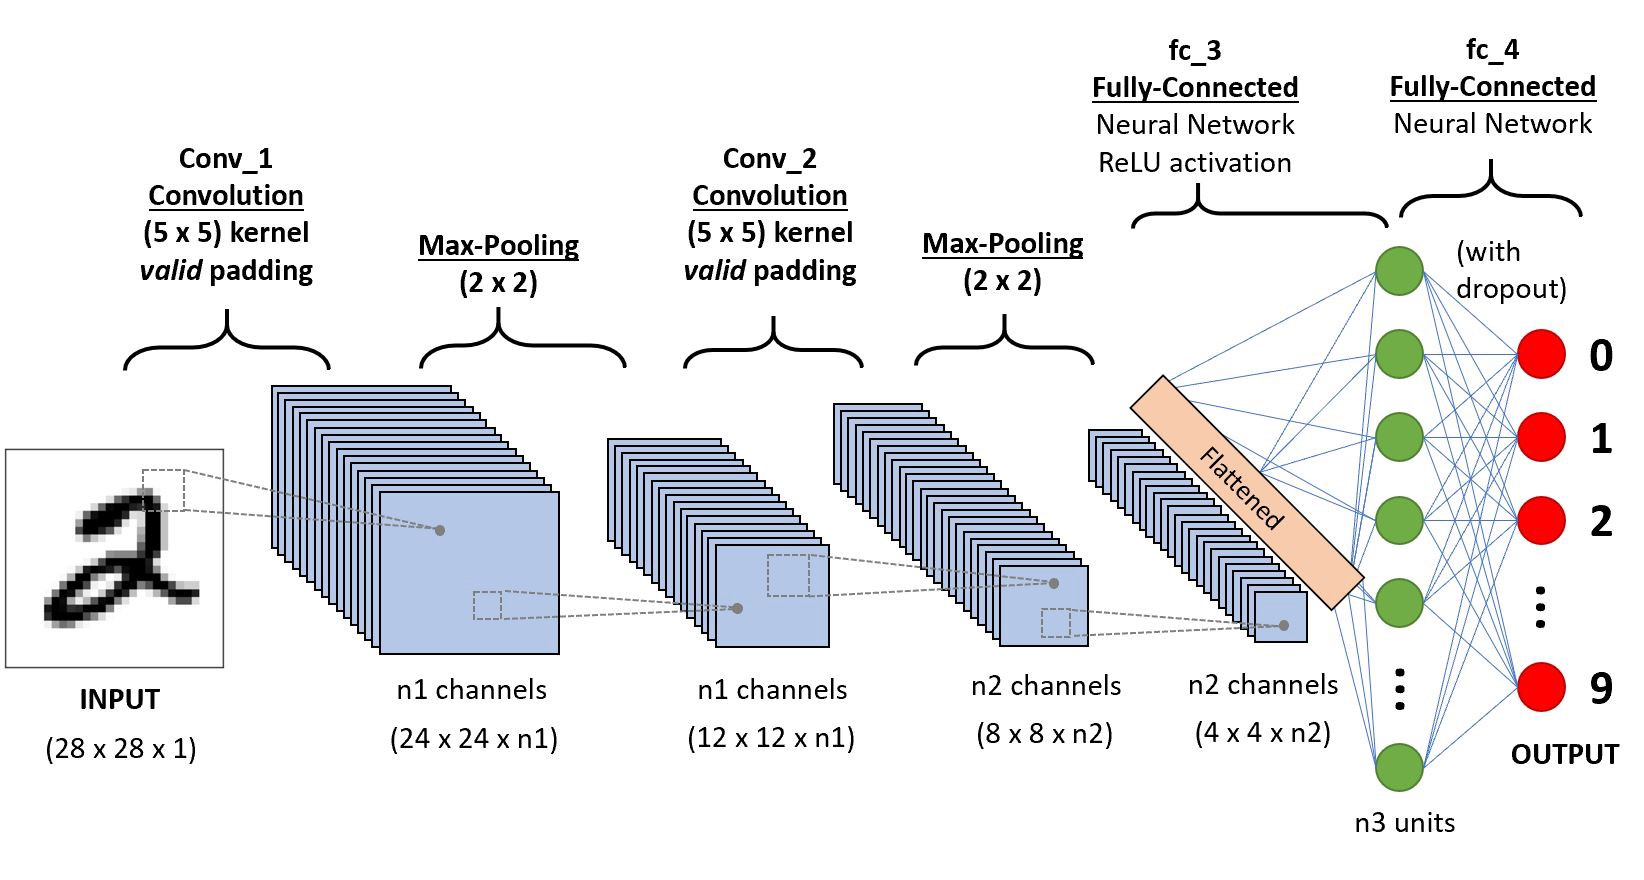






https://www.analyticsvidhya.com/blog/2020/10/what-is-the-convolutional-neural-network-architecture/



### Defining the model

In [147]:
model = tf.keras.models.Sequential()

### Adding first CNN layer

- Filters of size (kernel_size) traverse over the image to detect important features. The number of filters determine the depth of the output of the layer. Padding can be same or valid type. Same padding ensures that all the pixels are covered by the kernel with the aid of padding. CNN layers can work on both color and greyscale images, for color the depth will be 3 while for greyscale will be 1. Activation function such as ReLU adds non-linearity to the feature maps.

CNN layer hyper-parameters are:

*   filters: 32
*   kernel_size:3
*   padding: same
*   activation: relu
*   input_shape: (32, 32, 3)

In [148]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = 'same',activation='relu', input_shape=[32,32,3]))

### Adding second CNN layer and a maxpool layer

CNN layer hyper-parameters:

*   filters: 32
*   kernel_size:3
*   padding: same
*   activation: relu


MaxPool layer hyper-parameters:

*   pool_size: 2
*   strides: 2
*   padding: valid

- Pooling layer aids in reducing the dimension of the image by selecting the important features from the image. Pooling can be of two types:
      - Average Pool - Average value of the cells in the pool is taken
      - Max Pool - Max values of the cells in the pool is taken

In [149]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = 'same', activation='relu'))

In [150]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN layer

CNN layer hyper-parameters:


*   filters: 64
*   kernel_size:3
*   padding: same
*   activation: relu
*   input_shape: (32, 32, 3)

In [151]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding ='same', activation='relu'))

### Adding the fourth CNN layer and maxpool layer

CNN layer hyper-parameters:


*   filters: 64
*   kernel_size:3
*   padding: same
*   activation: relu

MaxPool layer hyper-parameters:


*   pool_size: 2
*   strides: 2
*   padding: valid

In [152]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3 , padding='same', activation='relu'))

In [153]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding = 'valid'))

### Adding the Flatten layer

- Since the dense layers only accepts inputs in vector form , so the image matrix need to be converted to vector form to be further processed by dense layers

In [154]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

- The task of the convolution layer and pooling layers is to extract the important features from the image and reduce the dimension of the feature maps.
- The final classification would be done by Dense layers , so couple of final layers of CNN are dense layers.


Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [155]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the Dropout layer

- Dropout is a Regularization technique where the neurons in a layer are set to zero. In this way, while training those neurons won't be updated.
This reduces the chance of overfitting of a network.

Dropout layer hyperparameter:
- rate : 0.4

In [156]:
model.add(tf.keras.layers.Dropout(rate=0.40))

### Adding the Output layer

- The number of units/neurons in the output layer is always equal to the number of classes into which classification needs to be done
- Here softmax is used as the activation fuction , as softmax gives prediction in terms of probability which sums up to 1.

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax

In [157]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Final model

The final model would look like

In [174]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = 'same',activation='relu', input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding ='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3 , padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding = 'valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3 , padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding = 'valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.40))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.40))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.40))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


## Model Summary

In [175]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

### Plot the model

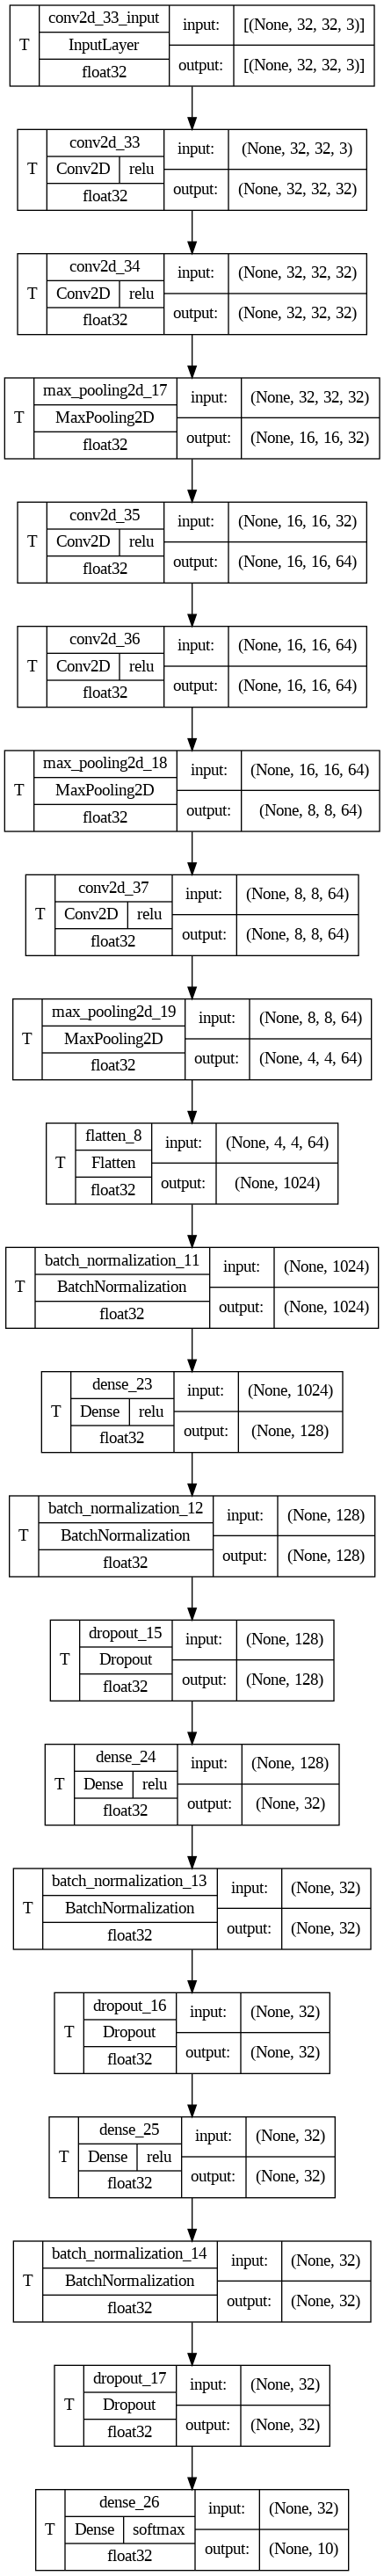

In [176]:
tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_dtype=True,
                          show_layer_activations=True,
                          show_trainable=True)

## Compile the model

- Optimizer: Adam

- Loss: Sparse categorical crossentropy - this is used when the number of classes to predict is more than two

In [177]:
#compile
model.compile(loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'], optimizer='Adam')

## Fit the model

training the model to learn from the train set

In [178]:
#fit the model
history = model.fit(X_train,y_train, epochs=30, validation_data=[X_val, y_val])

Epoch 1/30
1250/1250 [==============================] - 19s 10ms/step - loss: 2.1220 - sparse_categorical_accuracy: 0.2463 - val_loss: 1.7786 - val_sparse_categorical_accuracy: 0.3241
Epoch 2/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6183 - sparse_categorical_accuracy: 0.4017 - val_loss: 1.3449 - val_sparse_categorical_accuracy: 0.5014
Epoch 3/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4098 - sparse_categorical_accuracy: 0.4969 - val_loss: 1.4022 - val_sparse_categorical_accuracy: 0.5193
Epoch 4/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2622 - sparse_categorical_accuracy: 0.5605 - val_loss: 1.1331 - val_sparse_categorical_accuracy: 0.6017
Epoch 5/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1647 - sparse_categorical_accuracy: 0.6043 - val_loss: 1.1966 - val_sparse_categorical_accuracy: 0.5901
Epoch 6/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0931 

## Plot the metrics

In [179]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

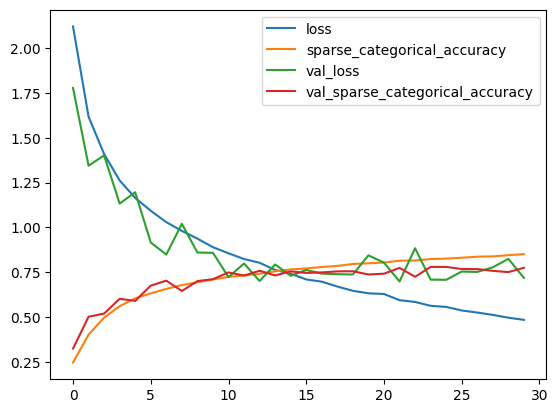

In [180]:
plt.plot(history.history['loss'])
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.legend(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
plt.show()

## Evaluate the model

- Checking the accuracy of the model on test set

In [181]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

313/313 [==============================] - 2s 5ms/step - loss: 0.7562 - sparse_categorical_accuracy: 0.7631


(0.7562384009361267, 0.7631000280380249)

In [182]:
print("Test accuracy is : {}".format(test_accuracy))

Test accuracy is : 0.7631000280380249


## Make some predictions

### define new test set
- same input format needed

In [183]:
batch_size = 5
X_test_new = X_test[:batch_size]
X_test_new.shape

(5, 32, 32, 3)

### making the prediction

In [184]:
y_pred =  model.predict(X_test_new)
y_pred

1/1 [==============================] - 0s 263ms/step


array([[1.3342567e-05, 3.4116192e-06, 1.1979897e-04, 7.7611536e-01,
        8.5873726e-05, 2.2296767e-01, 5.9184933e-04, 4.6041754e-05,
        4.7348371e-05, 9.2448408e-06],
       [5.8328029e-04, 4.0528658e-04, 1.7628949e-05, 4.3391596e-05,
        1.3424729e-05, 5.9559266e-06, 8.8043462e-06, 6.3614510e-07,
        9.9880517e-01, 1.1647596e-04],
       [1.5761925e-02, 9.0068594e-02, 1.8897629e-03, 2.5815445e-03,
        7.3055783e-04, 5.7018170e-04, 1.0691966e-03, 1.7588519e-04,
        8.6814362e-01, 1.9008700e-02],
       [3.1560349e-01, 8.7926127e-03, 3.7135579e-02, 8.8958137e-02,
        1.3033724e-01, 4.2842692e-03, 9.2113920e-02, 9.2355232e-04,
        3.2034248e-01, 1.5087279e-03],
       [5.1352796e-05, 1.9226927e-05, 5.1566525e-03, 4.6733073e-03,
        1.9590689e-03, 3.7944544e-04, 9.8771721e-01, 8.3922332e-06,
        1.7324852e-05, 1.7944265e-05]], dtype=float32)

### Mapping the prediction to the classes

In [185]:
predicted_class = np.argmax(y_pred, axis=1)
predicted_class

array([3, 8, 8, 8, 6])

### Actual Classes

In [186]:
y_test_new = y_test[:batch_size]
y_test_new

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [187]:
# accuracy
correct = 0
for i in range(batch_size):
    if predicted_class[i] == y_test_new[i]:
      correct += 1

accuracy = round(correct/batch_size,2)*100
print("Accuracy of the model on batch_size of {} images is {} %".format(batch_size, accuracy))

Accuracy of the model on batch_size of 5 images is 80.0 %


!!! Voila , Our model predicted most of the classes correctly

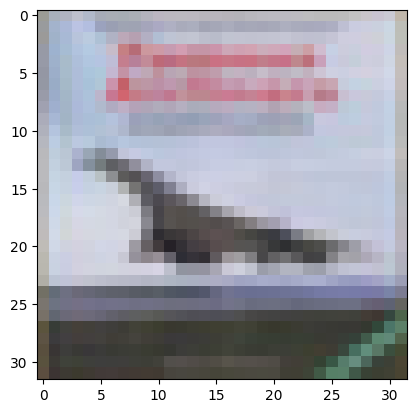

In [190]:
#plotting the wrong prediction
plt.imshow(X_test_new[3])

The above image is not even clear to human eye.

## Save the model for deployment

- Saving the architecture (topology) of the network

In [188]:
#save the model
model_json = model.to_json()
with open("fashin_model.json","w") as json_file:
  json_file.write(model_json)

- Saving network weights

In [189]:
#save weights
model.save_weights("fashion_model.h5")